# CZ1016 Individual Assignment（DS3_Huang Jingfang）
**Dataset:** Student Performance at two different schools (SchoolA and SchoolB, anonymized) for two different subjects (Mathematics and Language).

**Task:** Perform a detailed Exploratory Data Analysis (EDA) on the datasets, including but not limited to relevant statistical exploration and visualization you deem suitable, to understand the main influences on a student's performance in these two subjects (Mathematics and Language) across the two given schools. Try to answer the following questions based on your analysis.
>* Does the _family background_, _family relationship_ and _family support_ influence a student's performance?
>* What can _a student_ do (attributes that they can control) to improve their performance in these subjects?
>* What can _schools_ do (attributes that they can control) to help students perform better in these subjects?
>* Which school has _a better overall student performance_ in these two subjects? Why do you think that is?
>* How do the students perform _over time_? Are they consistent across terms, or do they gradually improve?

*Note that there may be some students common between the two datasets, and you will have to match all attributes (except marks) to find the intersection.*

---

### Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Import the Dataset

Firstly, check the information of both datasets(Math results and Language results).

In [2]:
# Students' Math results
MathData = pd.read_csv('performance_math.csv')
MathData.head()

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,Internet,Romantic,FamilyRel,FreeTime,GoingOut,Health,Absences,T1,T2,T3
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,...,No,No,4,3,4,3,6,5,6,6
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,...,Yes,No,5,3,3,3,4,5,5,6
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,...,Yes,No,4,3,2,3,10,7,8,10
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,...,Yes,Yes,3,2,2,5,2,15,14,15
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,...,No,No,4,3,2,5,4,6,10,10


In [3]:
# Students' Language results
LangData = pd.read_csv('performance_lang.csv')
LangData.head()

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,Internet,Romantic,FamilyRel,FreeTime,GoingOut,Health,Absences,T1,T2,T3
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,...,No,No,4,3,4,3,4,0,11,11
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,...,Yes,No,5,3,3,3,2,9,11,11
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,...,Yes,No,4,3,2,3,6,12,13,12
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,...,Yes,Yes,3,2,2,5,0,14,14,14
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,...,No,No,4,3,2,5,0,11,13,13


Check the vital statistics of the dataset using the `type` and `shape` attributes.

In [4]:
print("Data type : ", type(MathData))
print("Data dims : ", MathData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (395, 25)


In [5]:
print(MathData.dtypes)

School        object
Gender        object
Age            int64
Residence     object
MomEdu         int64
DadEdu         int64
MomJob        object
DadJob        object
TravelTime     int64
StudyTime      int64
PastFails      int64
SchoolSup     object
FamilySup     object
PaidSup       object
Activities    object
Internet      object
Romantic      object
FamilyRel      int64
FreeTime       int64
GoingOut       int64
Health         int64
Absences       int64
T1             int64
T2             int64
T3             int64
dtype: object


In [6]:
print("Data type : ", type(LangData))
print("Data dims : ", LangData.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (649, 25)


In [7]:
print(LangData.dtypes)

School        object
Gender        object
Age            int64
Residence     object
MomEdu         int64
DadEdu         int64
MomJob        object
DadJob        object
TravelTime     int64
StudyTime      int64
PastFails      int64
SchoolSup     object
FamilySup     object
PaidSup       object
Activities    object
Internet      object
Romantic      object
FamilyRel      int64
FreeTime       int64
GoingOut       int64
Health         int64
Absences       int64
T1             int64
T2             int64
T3             int64
dtype: object


---
## Calculate average mark for each student


Since the Marks are recorded after every term, namely `T1`,`T2`,`T3`, it will be more convenient if I were to calculate the "row-wise average"-the mean of the 3 marks `MathAve` and `LangAve` for each student from each dataset respectively, in order to plot graphs and do other comparisons to answer the questions we are interested.

* Assumption I am making here: the student's grade from each term is __equally important__.

In [8]:
#Attach the column of calculated average mark at the last column of the dataset
MathData['MathAve'] = MathData[['T1','T2','T3']].mean(axis=1)
LangData['LangAve'] = LangData[['T1','T2','T3']].mean(axis=1)

## Merge the two datasets

Since there are students with both Math and Language results. Here, I am creating two dataframes-one is the `union` of these two dataframes,which includes all the students (whoever have either Math results or Language results or both), the other one is `intersection`, which includes students with results of both subjects. 

In [9]:
# Change the column lable of marks for the two dataframes to mathT1,mathT2,mathT3, And langT1,langT2,langT3 respectively,
# so that when using merge function, all the other attributes will be compared other than marks
MathData.rename(columns={"T1":"mathT1","T2":"mathT2","T3":"mathT3"},inplace=True)
LangData.rename(columns={"T1":"langT1","T2":"langT2","T3":"langT3"},inplace=True)

In [10]:
intersection = pd.merge(MathData, LangData, how="inner")

In [11]:
union = pd.merge(MathData,LangData, how="outer")

In [12]:
# Check the values included in intersection
intersection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 38
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   School      39 non-null     object 
 1   Gender      39 non-null     object 
 2   Age         39 non-null     int64  
 3   Residence   39 non-null     object 
 4   MomEdu      39 non-null     int64  
 5   DadEdu      39 non-null     int64  
 6   MomJob      39 non-null     object 
 7   DadJob      39 non-null     object 
 8   TravelTime  39 non-null     int64  
 9   StudyTime   39 non-null     int64  
 10  PastFails   39 non-null     int64  
 11  SchoolSup   39 non-null     object 
 12  FamilySup   39 non-null     object 
 13  PaidSup     39 non-null     object 
 14  Activities  39 non-null     object 
 15  Internet    39 non-null     object 
 16  Romantic    39 non-null     object 
 17  FamilyRel   39 non-null     int64  
 18  FreeTime    39 non-null     int64  
 19  GoingOut    39 non-null     int

In [13]:
intersection.head()

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,Health,Absences,mathT1,mathT2,mathT3,MathAve,langT1,langT2,langT3,LangAve
0,SchoolA,Male,16,Urban,2,2,Other,Other,1,2,...,3,0,12,12,11,11.666667,13,12,13,12.666667
1,SchoolA,Male,15,Urban,2,2,Other,Other,1,3,...,3,0,14,16,16,15.333333,14,14,15,14.333333
2,SchoolA,Male,15,Urban,4,3,Teacher,Other,1,2,...,1,0,13,14,15,14.000000,12,13,14,13.000000
3,SchoolA,Male,15,Urban,4,4,HealthCare,HealthCare,1,1,...,5,0,12,15,15,14.000000,11,12,12,11.666667
4,SchoolA,Male,15,Urban,4,4,HealthCare,CivilService,1,2,...,5,0,9,11,12,10.666667,10,11,11,10.666667


In [14]:
#check the values in union
union.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1004
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   School      1005 non-null   object 
 1   Gender      1005 non-null   object 
 2   Age         1005 non-null   int64  
 3   Residence   1005 non-null   object 
 4   MomEdu      1005 non-null   int64  
 5   DadEdu      1005 non-null   int64  
 6   MomJob      1005 non-null   object 
 7   DadJob      1005 non-null   object 
 8   TravelTime  1005 non-null   int64  
 9   StudyTime   1005 non-null   int64  
 10  PastFails   1005 non-null   int64  
 11  SchoolSup   1005 non-null   object 
 12  FamilySup   1005 non-null   object 
 13  PaidSup     1005 non-null   object 
 14  Activities  1005 non-null   object 
 15  Internet    1005 non-null   object 
 16  Romantic    1005 non-null   object 
 17  FamilyRel   1005 non-null   int64  
 18  FreeTime    1005 non-null   int64  
 19  GoingOut    1005 non-null  

In [15]:
union.head()

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,Health,Absences,mathT1,mathT2,mathT3,MathAve,langT1,langT2,langT3,LangAve
0,SchoolA,Female,18,Urban,4,4,AtHome,Teacher,2,2,...,3,6,5.0,6.0,6.0,5.666667,NaN,NaN,NaN,NaN
1,SchoolA,Female,17,Urban,1,1,AtHome,Other,1,2,...,3,4,5.0,5.0,6.0,5.333333,NaN,NaN,NaN,NaN
2,SchoolA,Female,15,Urban,1,1,AtHome,Other,1,2,...,3,10,7.0,8.0,10.0,8.333333,NaN,NaN,NaN,NaN
3,SchoolA,Female,15,Urban,4,2,HealthCare,CivilService,1,3,...,5,2,15.0,14.0,15.0,14.666667,NaN,NaN,NaN,NaN
4,SchoolA,Female,16,Urban,3,3,Other,Other,1,2,...,5,4,6.0,10.0,10.0,8.666667,NaN,NaN,NaN,NaN


## Data Checking and Cleaning 

* Check whether all the grades are valid (between 0 to 20)
* Check whether there is any Null value

In [16]:
MathData.isnull().sum()

School        0
Gender        0
Age           0
Residence     0
MomEdu        0
DadEdu        0
MomJob        0
DadJob        0
TravelTime    0
StudyTime     0
PastFails     0
SchoolSup     0
FamilySup     0
PaidSup       0
Activities    0
Internet      0
Romantic      0
FamilyRel     0
FreeTime      0
GoingOut      0
Health        0
Absences      0
mathT1        0
mathT2        0
mathT3        0
MathAve       0
dtype: int64

In [17]:
LangData.isnull().sum()

School        0
Gender        0
Age           0
Residence     0
MomEdu        0
DadEdu        0
MomJob        0
DadJob        0
TravelTime    0
StudyTime     0
PastFails     0
SchoolSup     0
FamilySup     0
PaidSup       0
Activities    0
Internet      0
Romantic      0
FamilyRel     0
FreeTime      0
GoingOut      0
Health        0
Absences      0
langT1        0
langT2        0
langT3        0
LangAve       0
dtype: int64

In [18]:
MathData.loc[(MathData['mathT1']<0) | (MathData['mathT1']>20) | (MathData['mathT2']<0) | (MathData['mathT2']>20) | (MathData['mathT3']<0) | (MathData['mathT3']>100)]

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,Romantic,FamilyRel,FreeTime,GoingOut,Health,Absences,mathT1,mathT2,mathT3,MathAve


In [19]:
LangData.loc[(LangData['langT1']<0) | (LangData['langT1']>20) | (LangData['langT2']<0) | (LangData['langT2']>20) | (LangData['langT3']<0) | (LangData['langT3']>100)]

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,Romantic,FamilyRel,FreeTime,GoingOut,Health,Absences,langT1,langT2,langT3,LangAve


Therefore, I can conclude that the grades of students are **all valid** and there are **no NULL values** in both datasets.

In [20]:
# Number of students who have scored 0 for each subject
print("Number of students who scored 0 for Math T1:",(MathData['mathT1']==0).sum())
print("Number of students who scored 0 for Math T2:",(MathData['mathT2']==0).sum())
print("Number of students who scored 0 for Math T3:",(MathData['mathT3']==0).sum())
print("Number of students who scored 0 for Language T1:",(LangData['langT1']==0).sum())
print("Number of students who scored 0 for Lauguage T2:",(LangData['langT2']==0).sum())
print("Number of students who scored 0 for Lauguage T3:",(LangData['langT3']==0).sum())

Number of students who scored 0 for Math T1: 0
Number of students who scored 0 for Math T2: 13
Number of students who scored 0 for Math T3: 38
Number of students who scored 0 for Language T1: 1
Number of students who scored 0 for Lauguage T2: 7
Number of students who scored 0 for Lauguage T3: 15


It shows that there are some students who score 0 for one of their tests, and the number of students score 0 is diffrent for each term (increasing from term 1 to term 3 for both subjects), which means these students didn't score 0 for other terms. Therefore, these students might be important outliers I have to take note of. Since I cannot just assume they are absent from exams,and the reason for it is not clear, so I will just take it as they scored 0, but take note that Term 3 results(mean) may be worse than other terms because of students who scored 0.

---
## Question1 Does *family background*, *family relationship* and *family support* influence a student's performance?

**Part (a) Family Background:** To find out whether family background influence a student's performance,I have chosen few important variables:   `Residence`,`DadEdu`,`MomEdu`
> Reasonings are as below:
>- `Residence`: Whether a student is from **Urban** or **Rural** area will determine how much resources this student can get access to.
>- `DadEdu`: Parents' education level will likely affect the opportunities and support they can offer to their children, which may affect a student's grade.
>- `MomEdu`: Same reasoning as above.

In [21]:
# since family relationship,DadEdu,MomEdu is a numerical data,it is converted to categorical data first
MathData['FamilyRel'] = MathData['FamilyRel'].astype('category')
LangData['FamilyRel'] = LangData['FamilyRel'].astype('category')
union['FamilyRel'] = union['FamilyRel'].astype('category')
union['DadEdu']= union['DadEdu'].astype('category')
union['MomEdu']= union['MomEdu'].astype('category')

In [22]:
MathData[['Residence','School','MathAve','mathT1','mathT2','mathT3']].groupby(['Residence']).agg(['median','mean','var'])

MathAve                       mathT1                        \
              median       mean        var median       mean        var   
Residence                                                                 
Rural       9.833333   9.939394  13.786834     10  10.477273  11.677638   
Urban      11.000000  10.891422  13.474011     11  11.032573  10.796321   

          mathT2                       mathT3                        
          median       mean        var median       mean        var  
Residence                                                            
Rural         10   9.829545  15.154519     10   9.511364  20.758490  
Urban         11  10.967427  13.619851     11  10.674267  20.821656

In [23]:
LangData[['Residence','School','LangAve','langT1','langT2','langT3']].groupby(['Residence']).agg(['median','mean','var'])

LangAve                      langT1                      langT2  \
              median       mean       var median       mean       var median   
Residence                                                                      
Rural      10.666667  10.906937  9.022474     10  10.746193  7.425049     11   
Urban      12.000000  11.938053  7.290069     12  11.683628  7.334277     12   

                               langT3                        
                mean       var median       mean        var  
Residence                                                    
Rural      10.888325  9.620118     11  11.086294  12.997617  
Urban      11.867257  7.725134     12  12.263274   8.926098

Firstly, we compare the mean and median of the marks that students from rural area and urban area. From here, we can easily tell that the students from urban area generally did better,since they have higher mean and median, for both Math and Language. Additionally, smaller variance(less spread of datapoints) of students' results from urban area as compared to the rural one also tells us that the difference between better and worse students in urban region is lesser than the rural one.
However, there are more detailed ways to demonstrate the above conclusion.

<AxesSubplot:xlabel='LangAve', ylabel='Residence'>

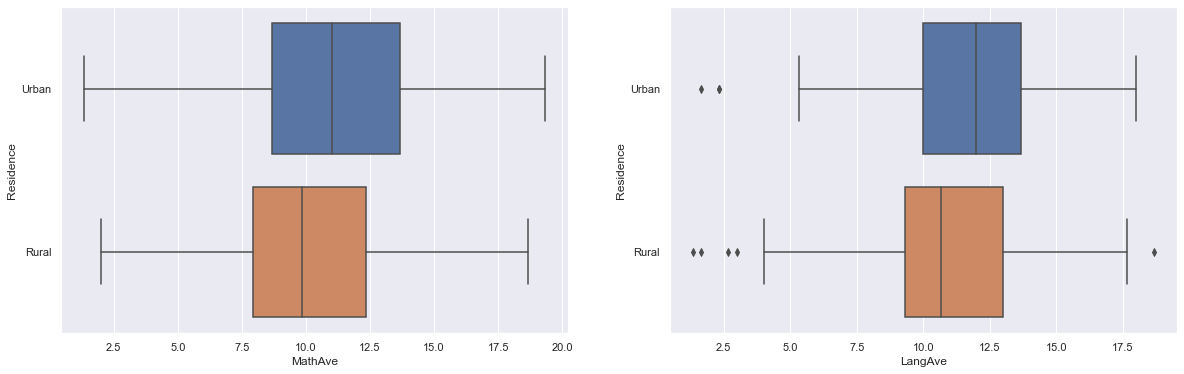

In [24]:
#Boxplot of Residence against average marks of both subjects 
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.boxplot(x="MathAve",y="Residence", data = MathData,ax = axes[0])
sb.boxplot(x="LangAve",y="Residence", data = LangData,ax = axes[1])

For example, if we compare the Language results, majority(75%) of students from urban region can score higher than 10.0 points but in the case of rural region, it is only about 63%, and there are more outliers in rural region as well - students who score very low for the test,similarly for Math results. We can also check the distribution of students' results from different regions for these two subjects.

<AxesSubplot:xlabel='LangAve', ylabel='Density'>

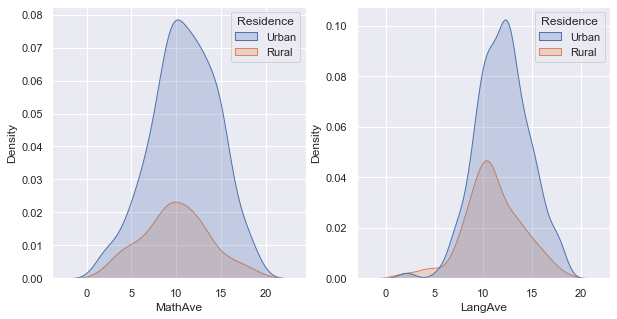

In [25]:
# Distribution plot to check 
f, axes = plt.subplots(1,2, figsize=(10, 5))
sb.kdeplot(data=union, x="MathAve", hue="Residence", fill=True,ax=axes[0])
sb.kdeplot(data=union, x="LangAve", hue="Residence", fill=True,ax=axes[1])

Based on the distribution plots above,for Language tests, more students from urban region could score better(higher than 10 points) and less score poorly(below 5 points) as compared to rural region.Thess results also align with the calculated mean/median and boxplots above. So it can be concluded that Students from urban region are more likely to perform better,especially in Language tests.

Since we know that there is one group of students who study both Math and Language, I want to furhter investigate that among this group of students,whether the urban students still perform better.

<AxesSubplot:xlabel='MathAve', ylabel='LangAve'>

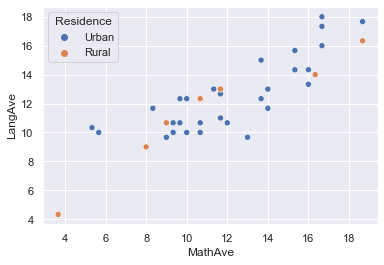

In [26]:
# Use Scatterplot to check how the distribution is like
sb.scatterplot(data=union,x="MathAve",y="LangAve",hue="Residence")

Interestingly, the results of students from rural region are very scattered, and the sample size is small(only 7 students), so I cannot really conclude much from this. However, one thing can be told is that among many urban students who take both subjects, none of them score very poorly for Language, which further supports my conclusion that the urban students perform better in Language tests. 

 Now, I want to investigate whether the **parents' education level** will affect students' performance in these two subjects.

<AxesSubplot:xlabel='DadEdu', ylabel='MathAve'>

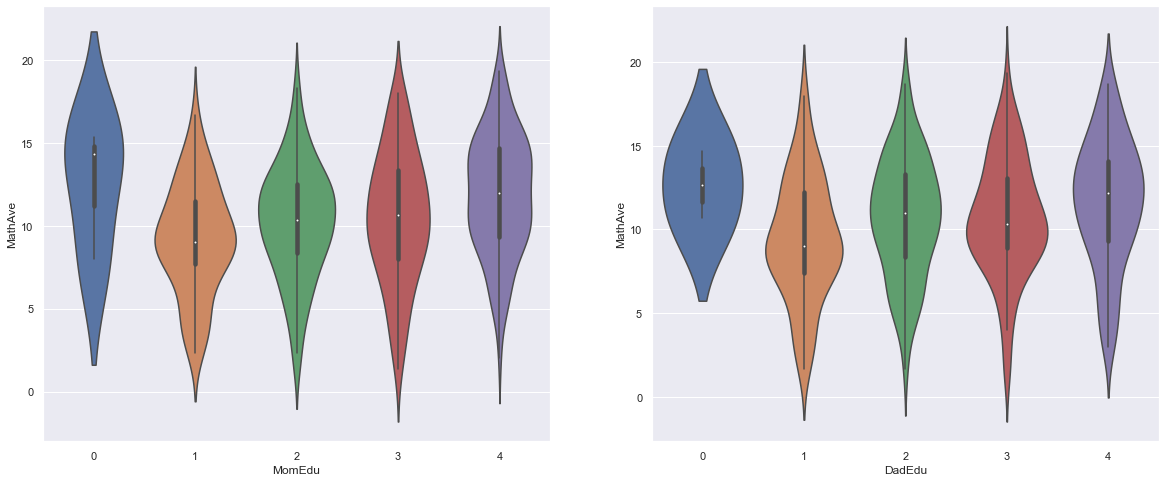

In [27]:
# Violinplot: Students' Math grades against Parents' education level 
f,axes = plt.subplots(1,2,figsize=(20,8))
sb.violinplot(x="MomEdu", y="MathAve", data=union,ax=axes[0])
sb.violinplot(x="DadEdu", y="MathAve", data=union,ax=axes[1])

<AxesSubplot:xlabel='DadEdu', ylabel='LangAve'>

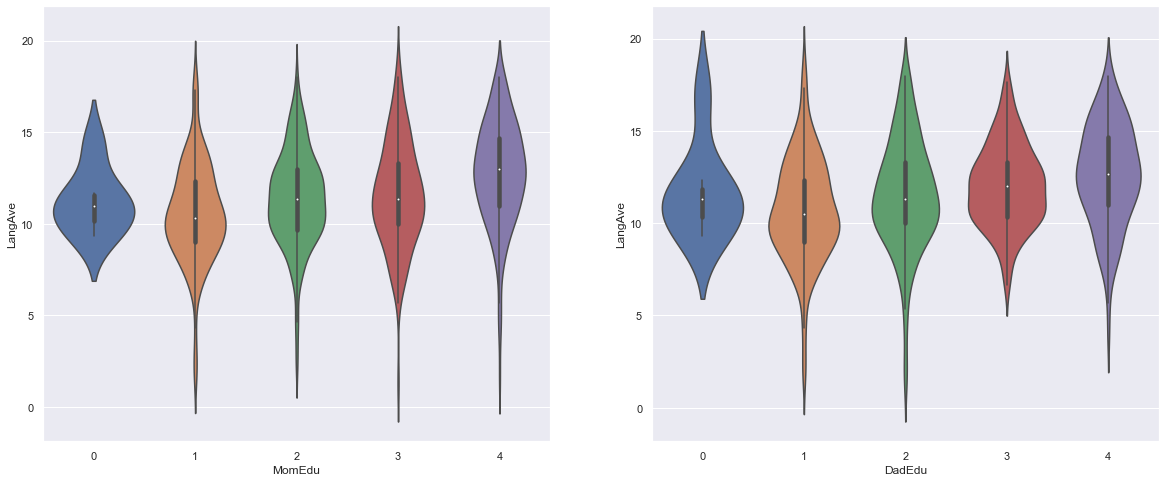

In [28]:
# Violinplot: Students' Language grades against Parents' education level 
f,axes = plt.subplots(1,2,figsize=(20,8))
sb.violinplot(x="MomEdu", y="LangAve", data=union,ax=axes[0])
sb.violinplot(x="DadEdu", y="LangAve", data=union,ax=axes[1])

* Based on the violin plots above, there is a trend that the higher the education level of students' parents, the better the students can perform, for both subjects.Even though there is an anomaly discovered in Math grade against DadEdu, whereby the median of students score  is lower despite their father's education level is 3 instead of 2. 
* I also discovered that students with parents who have no education background also score decently, which does not fit the pattern I found. So the next step I perform is to check the number of students under each distribution, to see whether it is due to a too small sample size.

In [29]:
#Check the value count of each, because the number of students with parents education 0 may be too few to conclude anything
print(union["MomEdu"].value_counts())
print(union["DadEdu"].value_counts())

4    291
2    278
3    233
1    195
0      8
Name: MomEdu, dtype: int64
2    313
1    247
3    221
4    215
0      9
Name: DadEdu, dtype: int64


It can be seen that the number of students whose parents have no educational background are very few (**less than 10** only), which makes this result being less representative than others and it can be a possible reason why the results obtained from this group of students do not fit the pattern well. 

I am also very interested to find out the reason why higher eduacation level can influence students'performance in a positive way, and check whether it aligns with my guess at the beginning, that is, parents with higher education level are able to provide better and more support to their children, that helps them to perform well in tests. Therefore, I plot another violin plot, similar to the previous one, but split each group according to the presence of family support.

<AxesSubplot:xlabel='DadEdu', ylabel='count'>

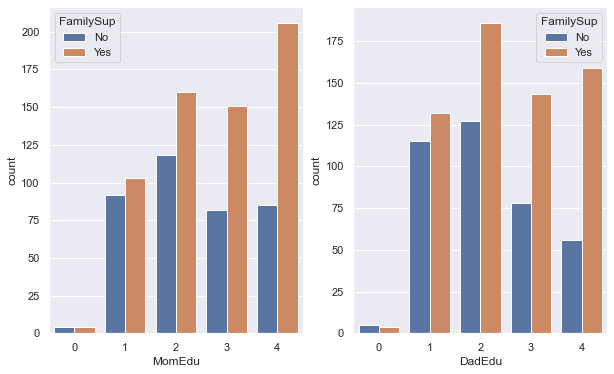

In [30]:
f,axes = plt.subplots(1,2,figsize=(10,6))
sb.countplot(x = "MomEdu", data = union, hue="FamilySup",ax=axes[0])
sb.countplot(x = "DadEdu", data = union, hue="FamilySup",ax=axes[1])

 * It seems there is indeed a relationship between presence of family support and parents' education level. For example, among parents' education level is 0 or 1,only 50% of them provide students with family support, but for parents' whose education level is above 3(3 or 4), more than 2/3 of parents will provide family support. It might be a supporting evidence that family suppport does help students to improve their results.
 * I will further check whether family support does impact on students' performance later.

**Part (b) Family Relationship:** To find out whether family relationship influence a student's performance.

 Check the distribution of students' family relationship to see whether there is any particular group with very small sample size.

<AxesSubplot:xlabel='FamilyRel', ylabel='count'>

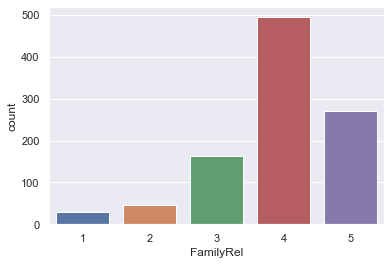

In [31]:
sb.countplot(x = "FamilyRel", data = union)

<AxesSubplot:xlabel='FamilyRel', ylabel='MathAve'>

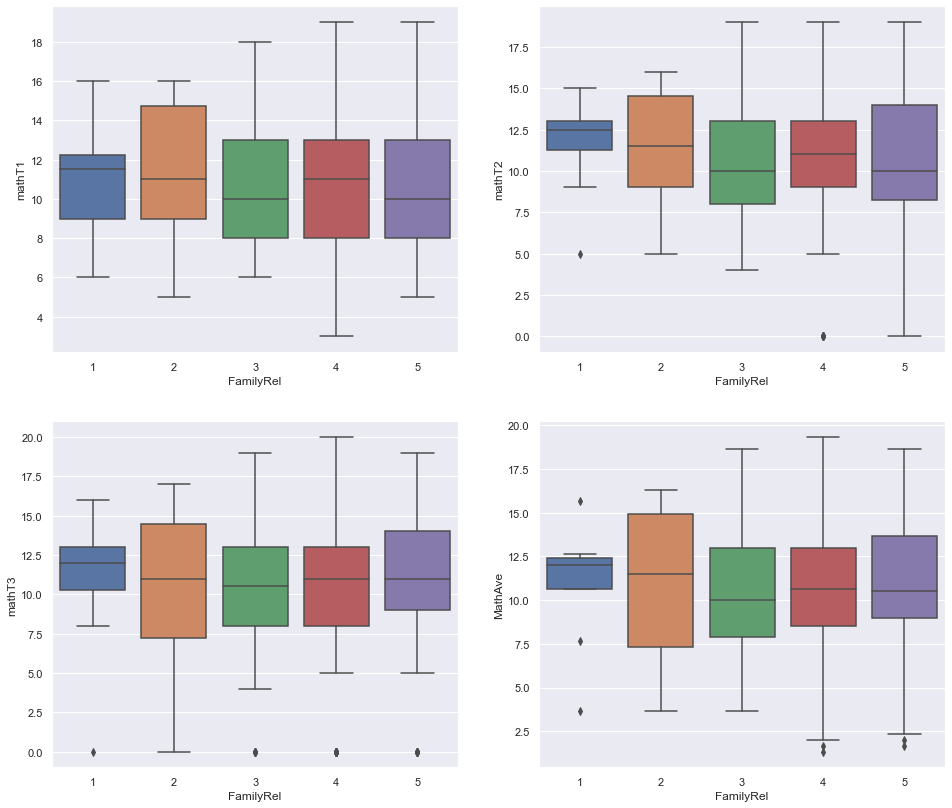

In [32]:
# Boxplot : FamilyRel against Math results
f, axes = plt.subplots(2,2, figsize=(16, 14))

sb.boxplot(x = 'FamilyRel', y = 'mathT1', data = MathData, ax = axes[0,0])
sb.boxplot(x = 'FamilyRel', y = 'mathT2', data = MathData, ax = axes[0,1])
sb.boxplot(x = 'FamilyRel', y = 'mathT3', data = MathData, ax = axes[1,0])
sb.boxplot(x = 'FamilyRel', y = 'MathAve', data = MathData,ax = axes[1,1])

<AxesSubplot:xlabel='FamilyRel', ylabel='LangAve'>

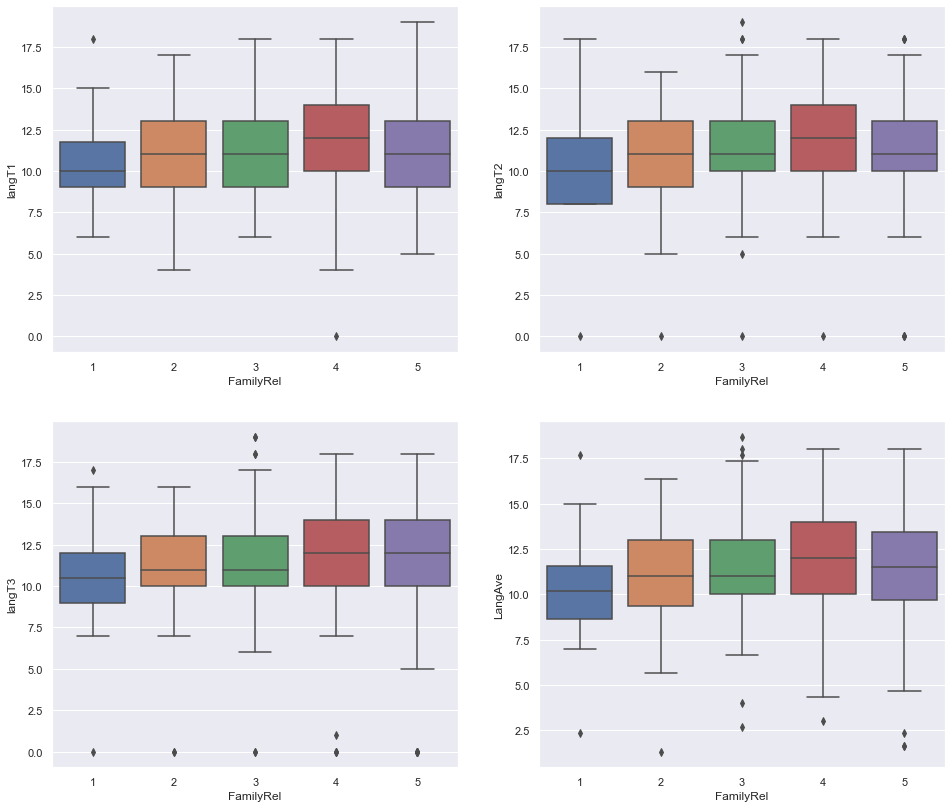

In [33]:
# Boxplot : FamilyRel against Lang results
f, axes = plt.subplots(2, 2, figsize=(16, 14))

sb.boxplot(x = 'FamilyRel', y = 'langT1', data = LangData, ax = axes[0,0])
sb.boxplot(x = 'FamilyRel', y = 'langT2', data = LangData, ax = axes[0,1])
sb.boxplot(x = 'FamilyRel', y = 'langT3', data = LangData, ax = axes[1,0])
sb.boxplot(x = 'FamilyRel', y = 'LangAve', data = LangData, ax = axes[1,1])

The box plots above show that Family relationship does not affect student's math results much. In fact in term 2, majority of students with family relationship=2 score better than students with better Family Relationship, as medain, upper&lower quatile all higher than family relationship=5. However, it is not the case for Language test,the better the family relationship is, the higher the students can score in Language, and it is true for every term. One possible reason we can infer from this is possibly - higher quality communication is needed for maintaining good family relationship, and students with good communication skill from these families can thus score better in Language tests. 

Again, I want to check whether better family relationship also contribute to the better grades of students'among the students who study **both subjects**. But all the results are very scattered so nothing much can be concluded.

<AxesSubplot:xlabel='MathAve', ylabel='LangAve'>

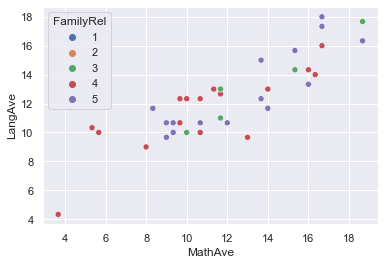

In [34]:
# Scatterplot to check the distrbution of datapoints
sb.scatterplot(data=union,x="MathAve",y="LangAve",hue="FamilyRel",legend="full")

**Part (c) Family Support:** To find out whether family background influence a student's performance

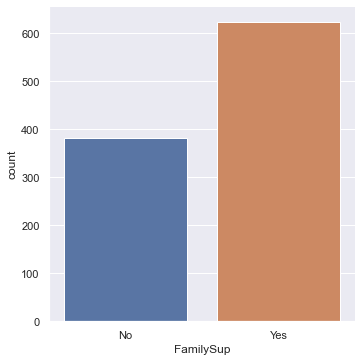

In [35]:
#Check the distribution first
sb.catplot(x = "FamilySup", data = union,kind = "count")

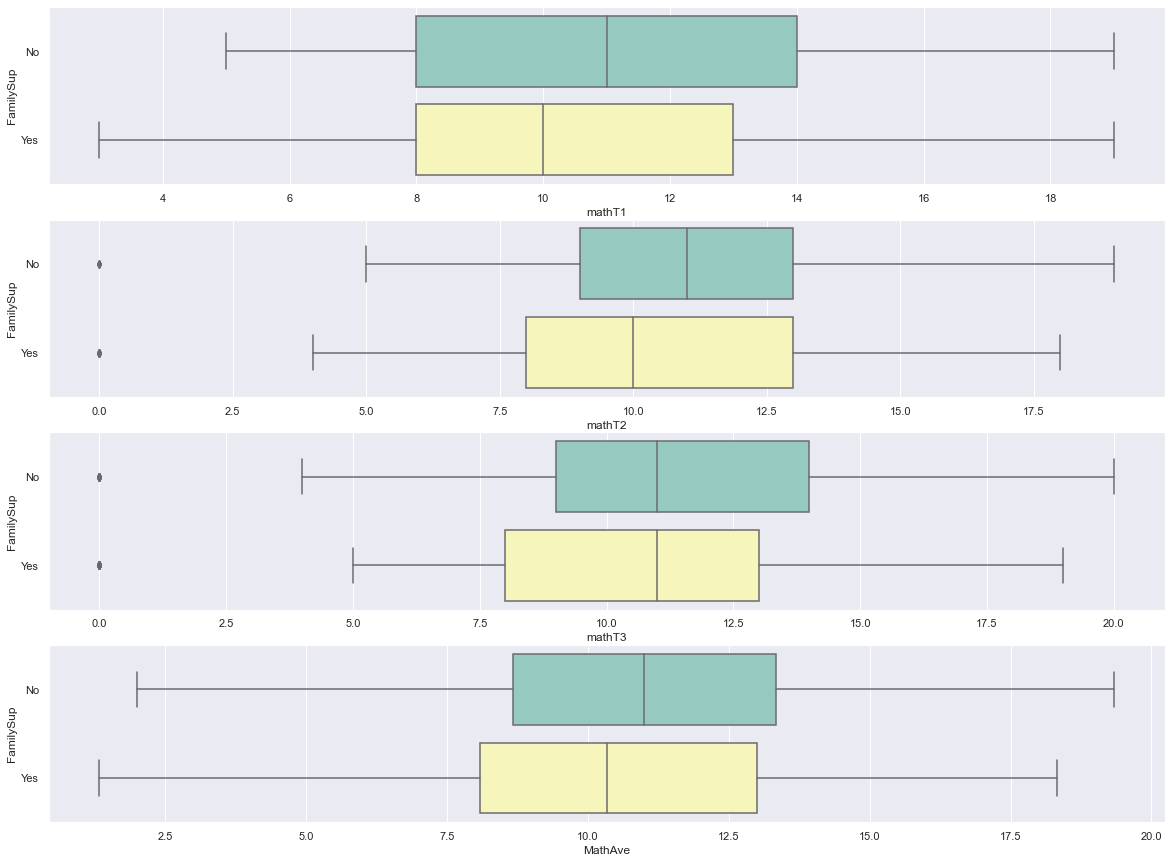

In [36]:
#Boxplot: Family support against Math results
Mathmarks = pd.DataFrame(MathData[['mathT1','mathT2','mathT3','MathAve']])
f,axes = plt.subplots(4,1,figsize=(20,15))
count = 0 
for var in Mathmarks:
    sb.boxplot(y = 'FamilySup',data = union, x = Mathmarks[var], palette="Set3",ax=axes[count])
    count += 1

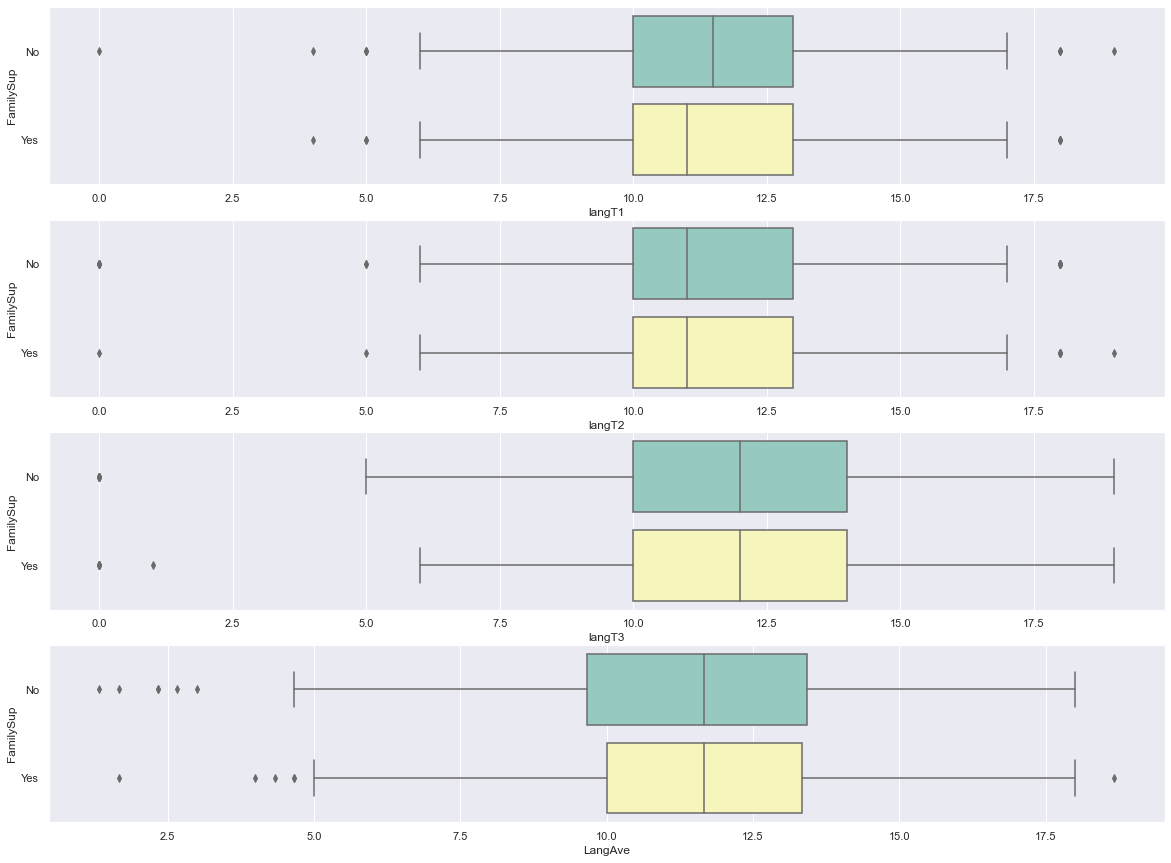

In [37]:
#Boxplot: Family support against Language results
Langmarks = pd.DataFrame(LangData[['langT1','langT2','langT3','LangAve']])
f,axes = plt.subplots(4,1,figsize=(20,15))
count = 0 
for var in Langmarks:
    sb.boxplot(y = 'FamilySup',data = union, x = Langmarks[var],palette="Set3",ax=axes[count])
    count += 1

The boxplots above show us that Family support does not influece students' results much because the majority of the students' results remain almost the same with or without family support. Morover, students with family support perform even worse in Math test(as both median and upper&lower quatile lower than the students without family support).For language, at least students with Family support would not do too poorly(based on the number of outliers below 'minimum') .

<AxesSubplot:xlabel='LangAve', ylabel='Density'>

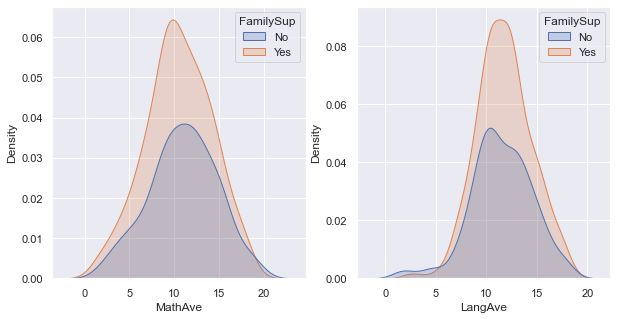

In [38]:
# Distribution plot to check 
f, axes = plt.subplots(1,2, figsize=(10, 5))
sb.kdeplot(data=union, x="MathAve", hue="FamilySup", fill=True,ax=axes[0])
sb.kdeplot(data=union, x="LangAve", hue="FamilySup", fill=True,ax=axes[1])

Again, use distribution plot to check the actaul distributions of the datapoints, and it indeed aligns with the results obtained from box plots.

<AxesSubplot:xlabel='MathAve', ylabel='LangAve'>

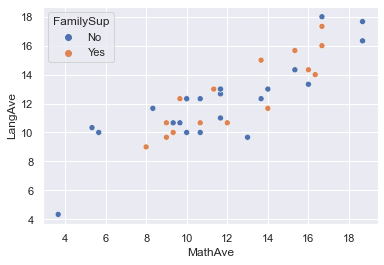

In [39]:
# Scatterplot to check the distrbution of datapoints
sb.scatterplot(data=union,x="MathAve",y="LangAve",hue="FamilySup",legend="full")

From the above analysis, another interesting quetion to ask is, whether there is a close or positive relationship between Family support and family relationship, meaning , the better the family relationship is, the more support that the parents are likely to provide to the students.

<AxesSubplot:xlabel='FamilyRel', ylabel='FamilySup'>

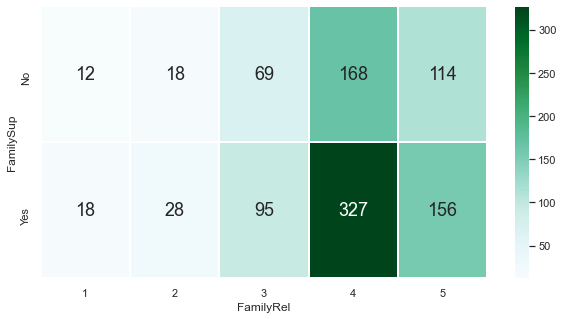

In [40]:
# Distribution of Family Relationship across Family Support
f = plt.figure(figsize=(10, 5))
sb.heatmap(union.groupby(['FamilySup', 'FamilyRel']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

It is very obvious that when family relationship = 4, the number of students with family support in their studies is almost double the number of students withou it, as compared to family relationship=1, the number of students without family support is 2/3 of the number of students with family support. Even though the statistic results do not show me the direct impact of each of this factor on the students' performance, but the combine effect of these two will likely to positively influence a student in the long term. (Prediction model is not done in this exercise)

---
## Question 2 What can a student do (attributes that they can control) to improve their performance in these subjects?

To answer this question, I have chosen few relevant variables: `StudyTime`,`Activities`,`GoingOut`
I want to find out:
* Does investing more time to study help with their results?
* Whether cutting down going out time can improve their grades?
* Do extra activities affect their results?

In [41]:
# Find out the relationship between StudyTime and Grades
# Convert StudyTime and GoingOut to categorical data
union['StudyTime'] = union['StudyTime'].astype('category')
union['GoingOut'] = union['GoingOut'].astype('category')

<AxesSubplot:xlabel='StudyTime', ylabel='MathAve'>

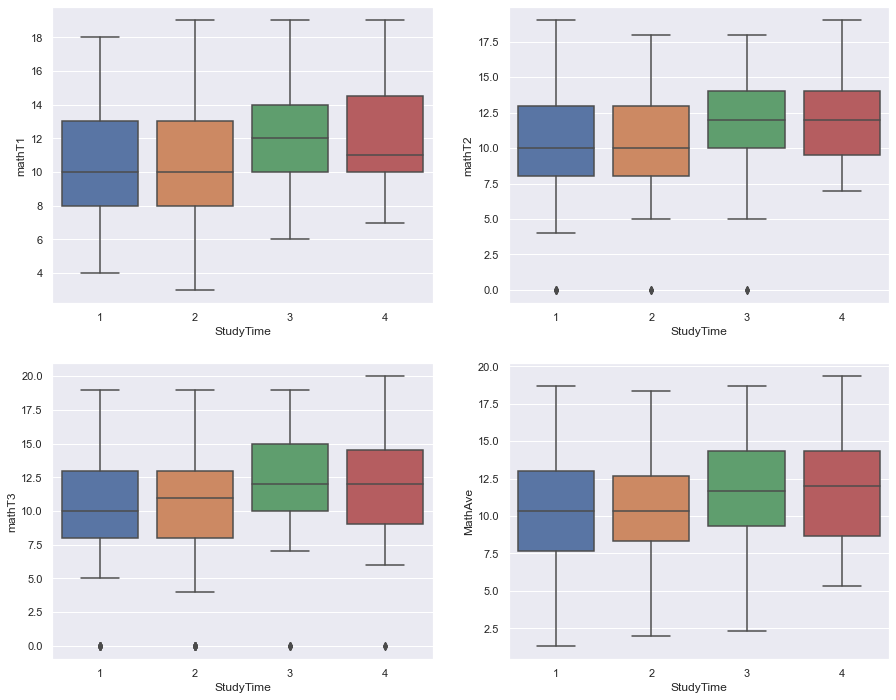

In [42]:
# Boxplot : StudyTime against Math results
f, axes = plt.subplots(2, 2, figsize=(15, 12))

sb.boxplot(x = 'StudyTime', y = 'mathT1', data = union, ax = axes[0,0])
sb.boxplot(x = 'StudyTime', y = 'mathT2', data = union, ax = axes[0,1])
sb.boxplot(x = 'StudyTime', y = 'mathT3', data = union, ax = axes[1,0])
sb.boxplot(x = 'StudyTime', y = 'MathAve', data = union, ax = axes[1,1])

<AxesSubplot:xlabel='StudyTime', ylabel='LangAve'>

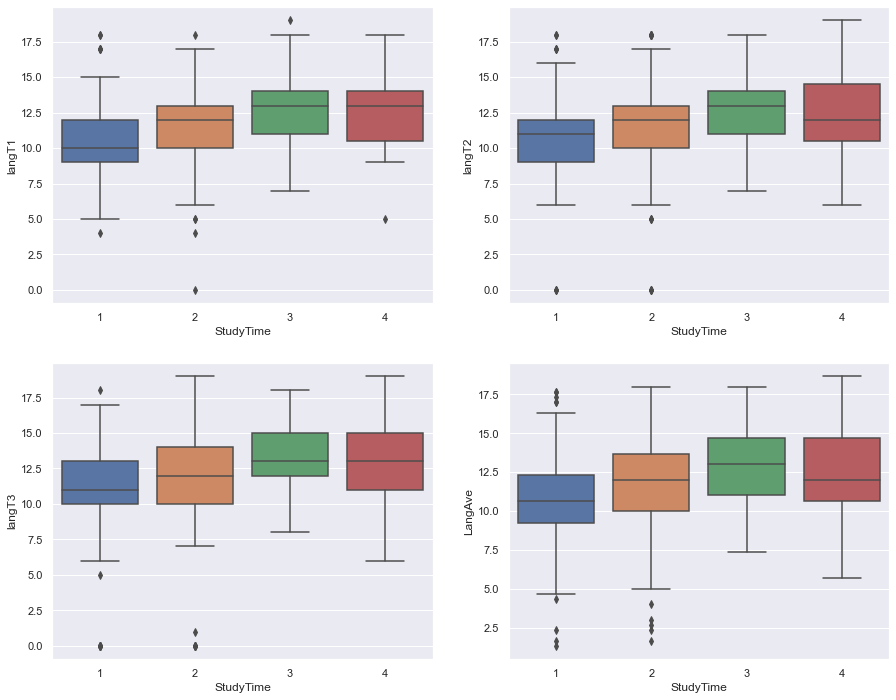

In [43]:
# Boxplot : StudyTime against Lang results
f, axes = plt.subplots(2, 2, figsize=(15, 12))

sb.boxplot(x = 'StudyTime', y = 'langT1', data = union, ax = axes[0,0])
sb.boxplot(x = 'StudyTime', y = 'langT2', data = union, ax = axes[0,1])
sb.boxplot(x = 'StudyTime', y = 'langT3', data = union, ax = axes[1,0])
sb.boxplot(x = 'StudyTime', y = 'LangAve', data = union, ax = axes[1,1])

For both subjects, increasing study time also shows improving grades,espcially when it increases from 1 to 3 (1-10 hours), but there isn't much difference on their grades whether a student study between 5-10 hours weekly or more than 10 hours weekly. A possible reason can be the efficiency does not really increase even though the time spent has increased.

I will talk about what students could consider doing to improve their grades later.

<AxesSubplot:xlabel='LangAve', ylabel='Density'>

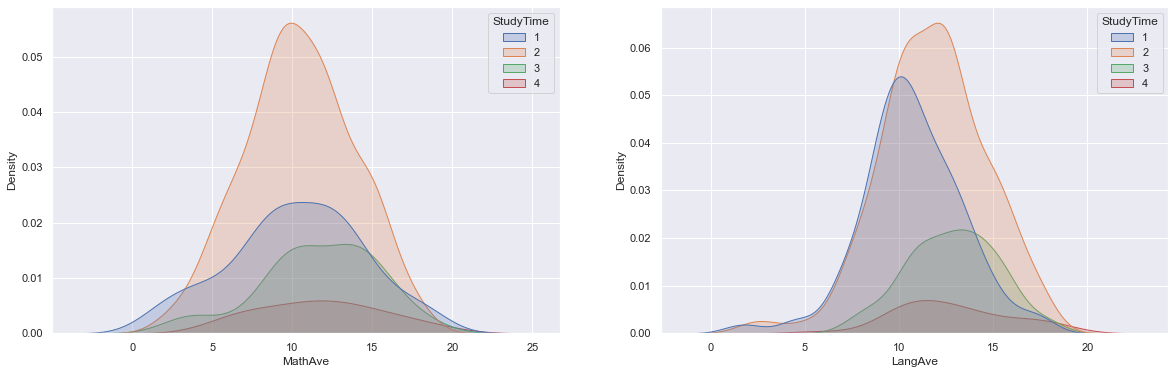

In [44]:
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.kdeplot(data=union, x="MathAve",hue="StudyTime",fill=True,ax=axes[0])
sb.kdeplot(data=union, x="LangAve",hue="StudyTime",fill=True,ax=axes[1])

Check the distribution of results of students who spent different amount of time to study for each subject, and the results align with our conclusion - those who 5-10 hours every week perform the best among all, for both subjects. 

Now take a look at how does going out time affect their grades.

<AxesSubplot:xlabel='GoingOut', ylabel='MathAve'>

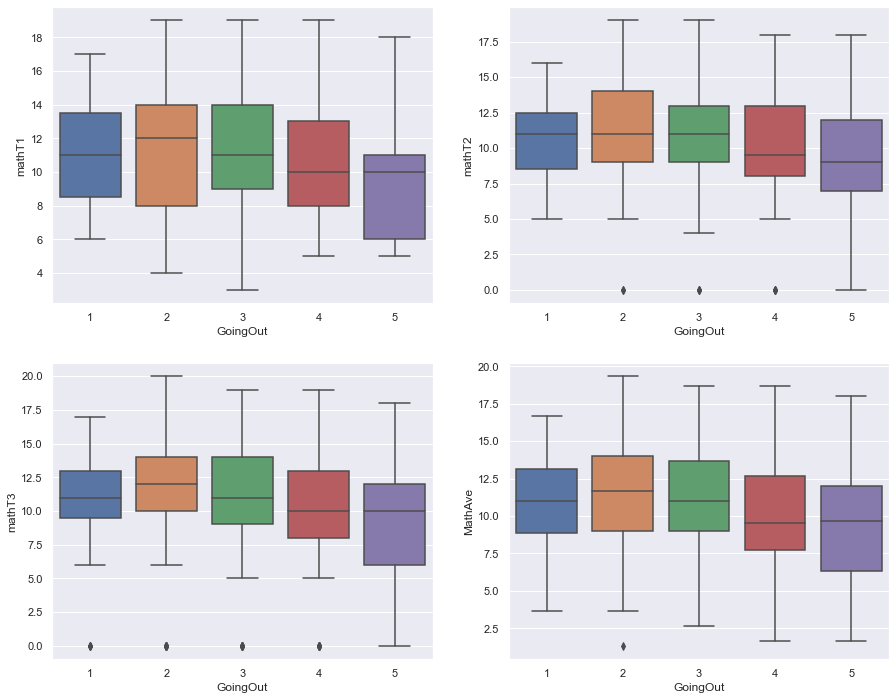

In [45]:
# Find out the relationship between GoingOut time and Grades
f, axes = plt.subplots(2, 2, figsize=(15, 12))

sb.boxplot(x = 'GoingOut', y = 'mathT1', data = union, ax = axes[0,0])
sb.boxplot(x = 'GoingOut', y = 'mathT2', data = union, ax = axes[0,1])
sb.boxplot(x = 'GoingOut', y = 'mathT3', data = union, ax = axes[1,0])
sb.boxplot(x = 'GoingOut', y = 'MathAve', data = union, ax = axes[1,1])

<AxesSubplot:xlabel='GoingOut', ylabel='LangAve'>

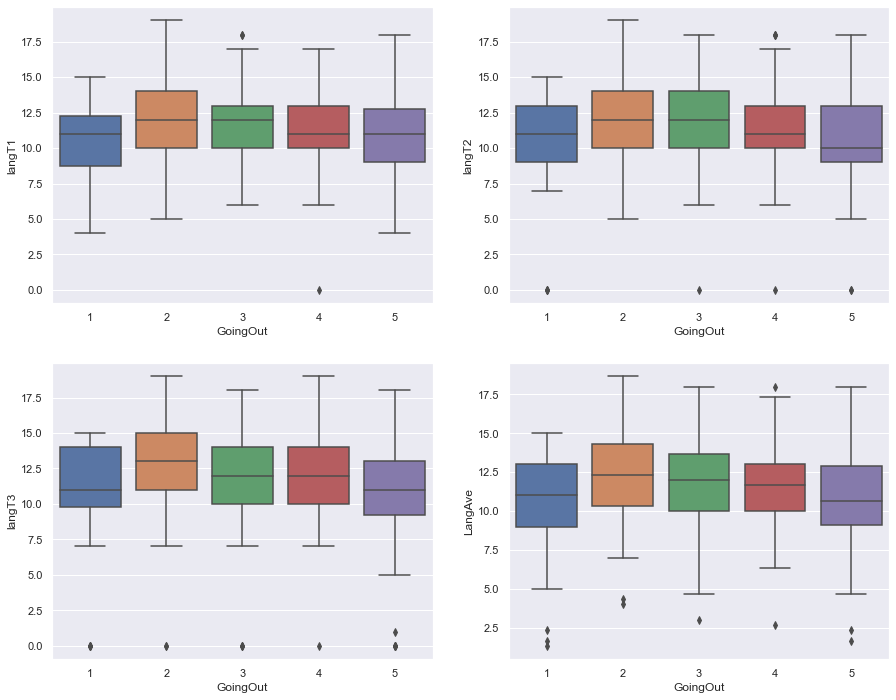

In [46]:
f, axes = plt.subplots(2, 2, figsize=(15, 12))

sb.boxplot(x = 'GoingOut', y = 'langT1', data = union, ax = axes[0,0])
sb.boxplot(x = 'GoingOut', y = 'langT2', data = union, ax = axes[0,1])
sb.boxplot(x = 'GoingOut', y = 'langT3', data = union, ax = axes[1,0])
sb.boxplot(x = 'GoingOut', y = 'LangAve', data = union, ax = axes[1,1])

From the boxplots above, the more time that students spent to go out, the lower they get for their tests, it is also true for both subjects. However, there is one thing that caught my attention. students who spent least of the time going out with friends(GoingOut=1) score even worse than others(eg. GoingOut=2), which does not fit the pattern. So the possible reason I can infer is that every student need to strike a balance between study and have fun. While they cannot afford going out too often(2 and 3 give the better grades), having too little time going out does not help with their study as well. Below is to check the distribution of their results, and it confirms the pattern I have found out.

<AxesSubplot:xlabel='LangAve', ylabel='Density'>

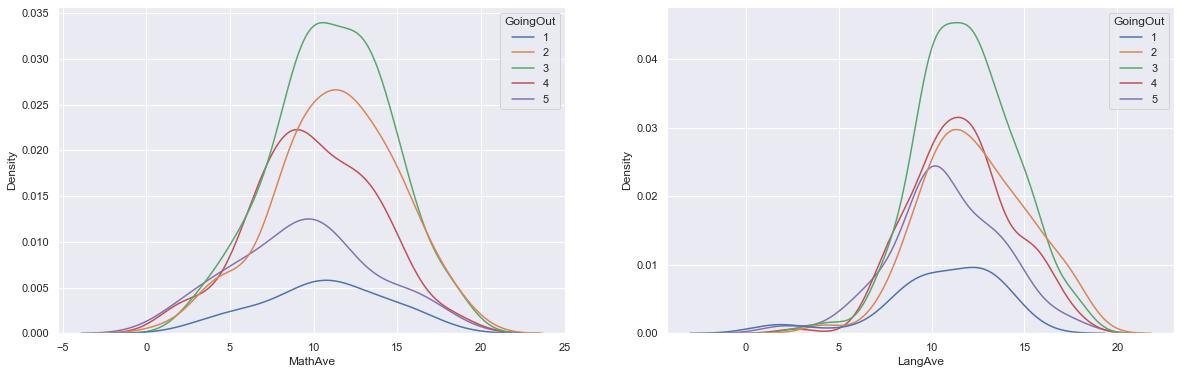

In [47]:
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.kdeplot(data=union, x="MathAve",hue="GoingOut",ax=axes[0])
sb.kdeplot(data=union, x="LangAve",hue="GoingOut",ax=axes[1])

In order to check whether it is true that students who spend more time studying actually going out less, I plot a heatmap to visualise their time allocation. 

<AxesSubplot:xlabel='GoingOut', ylabel='StudyTime'>

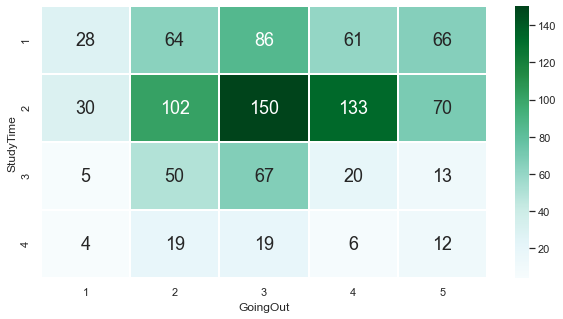

In [48]:
# Distribution of Family Relationship across Family Support
f = plt.figure(figsize=(10, 5))
sb.heatmap(union.groupby(['StudyTime', 'GoingOut']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

And indeed, results shows that Students who spend a lot of time going out with friends actually spend less time studying(by looking at the bottom right corner of the heatmap).

Now I want to find out other than time management, whether there are other factors affecting their results, for example, joining extra activities.

<AxesSubplot:xlabel='Activities', ylabel='LangAve'>

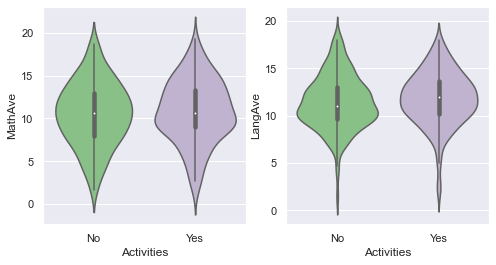

In [49]:
f, axes = plt.subplots(1, 2, figsize=(8, 4))
sb.violinplot(data=union,x="Activities",y="MathAve",ax=axes[0],palette="Accent")
sb.violinplot(data=union,x="Activities",y="LangAve",ax=axes[1],palette="Accent")

The above violinplots show that not only extra activities will not affect students' grades, it may even have some positive impacts on their grades.However, it is important to keep other variables constant while making the comparison between students with or without joining extra activities, for instance, I compare the students who spend about the same amound of time to study.

<AxesSubplot:xlabel='StudyTime', ylabel='LangAve'>

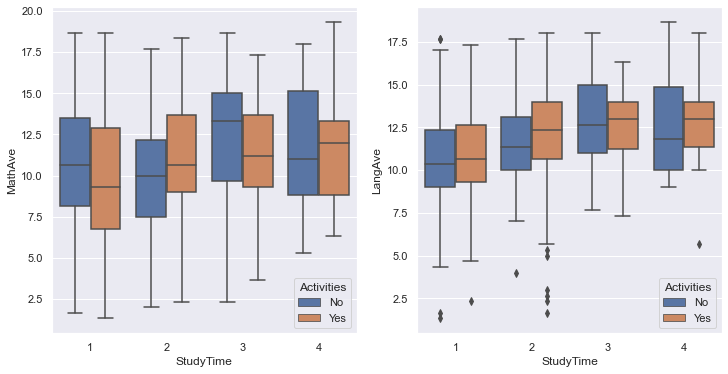

In [50]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))
sb.boxplot(data=union,hue="Activities",y="MathAve",x="StudyTime",ax=axes[0])
sb.boxplot(data=union,hue="Activities",y="LangAve",x="StudyTime",ax=axes[1])

From these two plots, my observation is still similar to the previous one. Activities do not have too much negative impact on students' grades, and might even affect them positively. Especially for Language test, students who join extra activities can even score better than those who do not do so.(True for more than 75% of students).

**< Conclusion >**:
* Therefore, for students who spend less than 5 hours( StudyTime=2 and below) weekly,one thing they can do is to increase the time spent on the subjects. But for students who already spend 5-10 hours on it,it will be more important and meaningful for them to reflect whether they are using their time wisely and how to improve their efficiency.
* For students who have been going out with friends too much, they should consider allocating more time for their own studies, but for those who have not been spending time going out friends at all, they might also consider relax a bit, go out have fun with friends to destress.
* Finally, joining some other activities might also help (probably through some indirect ways).

___

## Question3 What can schools do (attributes that they can control) to help students perform better in these subjects?

Some variables that I choose to analyze are: `SchoolSup`,`Absences`  
Reasons:
> `SchoolSup`: extra educational support provided by school such as additional classes or enriching programmes can help to improve students' skills as well as their performance.  
> `Absences`: Higher absence rate is not a good reflection as it might due to students' attitude problems or some flaws of school policies, so it is something that school should take note of and try to minimise.

#### School Support

Since school support refers to extra educational support provided by school,I want to compare the difference of the grades between students with and without school support.

<AxesSubplot:xlabel='LangAve', ylabel='SchoolSup'>

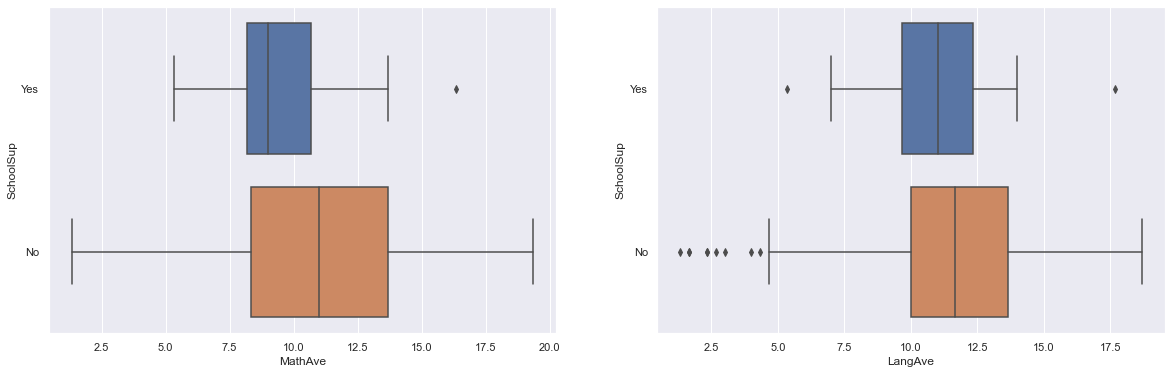

In [51]:
#Boxplot schoolsup against avemark for both subjects 
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.boxplot(x="MathAve",y="SchoolSup", data = MathData,ax = axes[0])
sb.boxplot(x="LangAve",y="SchoolSup", data = LangData,ax = axes[1])

Firstly, take a look at how the majority of the students score with school support and without school support. Surprisingly, students without school support is not doing any worse than those with support. But again, I want to check how the distribution of the grades is like as well as the estimated percentage of students who actually get support from schools. So I have decided to use swarmplot.

<AxesSubplot:xlabel='SchoolSup', ylabel='LangAve'>

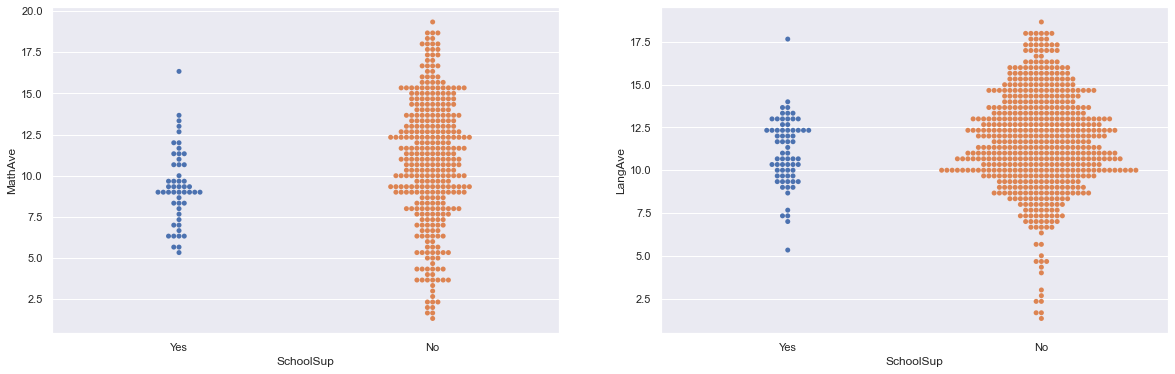

In [52]:
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.swarmplot(x="SchoolSup", y="MathAve", data=union,ax=axes[0])
sb.swarmplot(x="SchoolSup", y="LangAve", data=union,ax=axes[1])

From here, most of the students actually do not have school support, so it is a bit hard to do the comparison-whether school support help. But one thing can be concluded is that with school support, at least there are no students who score below 5, so school should consider channel more resources to provide support for their students, and maybe there will be more students benefit from it.

In [53]:
MathData[['School','MathAve','mathT1','mathT2','mathT3','SchoolSup']].groupby(['School','SchoolSup']).agg(['median','mean'])

MathAve            mathT1            mathT2             \
                      median       mean median       mean median       mean   
School  SchoolSup                                                             
SchoolA No         11.166667  10.973154   11.0  11.258389     11  10.989933   
        Yes         9.000000   9.359477    8.0   9.078431     10   9.568627   
SchoolB No         10.166667  10.239130   10.5  10.673913     10  10.195652   

                  mathT3             
                  median       mean  
School  SchoolSup                    
SchoolA No            11  10.671141  
        Yes           10   9.431373  
SchoolB No            10   9.847826

In [54]:
LangData[['School','LangAve','langT1','langT2','langT3','SchoolSup']].groupby(['School','SchoolSup']).agg(['median','mean'])

LangAve            langT1            langT2             \
                      median       mean median       mean median       mean   
School  SchoolSup                                                             
SchoolA No         12.333333  12.410536   12.0  12.174387   12.0  12.299728   
        Yes        11.166667  11.089286   11.0  10.750000   11.0  11.125000   
SchoolB No         10.000000  10.456386   10.0  10.252336   10.0  10.471963   
        Yes        10.500000  10.944444   10.5  11.166667   10.5  10.916667   

                  langT3             
                  median       mean  
School  SchoolSup                    
SchoolA No          13.0  12.757493  
        Yes         11.0  11.392857  
SchoolB No          10.5  10.644860  
        Yes         11.0  10.750000

By checking the mean and median for both subjects again, for both schools, students' results for both subjects do not improve much even with school support. But as the previous statement I made, school only give support to a small group of student, which makes it hard to conclude whether it helps, but one thing school can do is to providde support to those students who score significantly lower than average.

#### Absences

Guess: Lower absence rate implies that students like to go school more as well as more disciplined, both might help them achieve better grades. So I decide to use jointplot to explore the distribution of students' results according to number of days they are absent from school. 

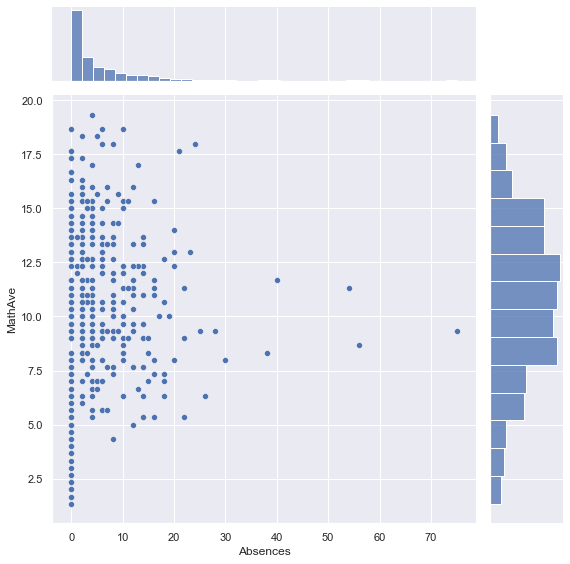

In [55]:
#Math results VS Absences
sb.jointplot(data = MathData, x = "Absences", y = "MathAve", height = 8)

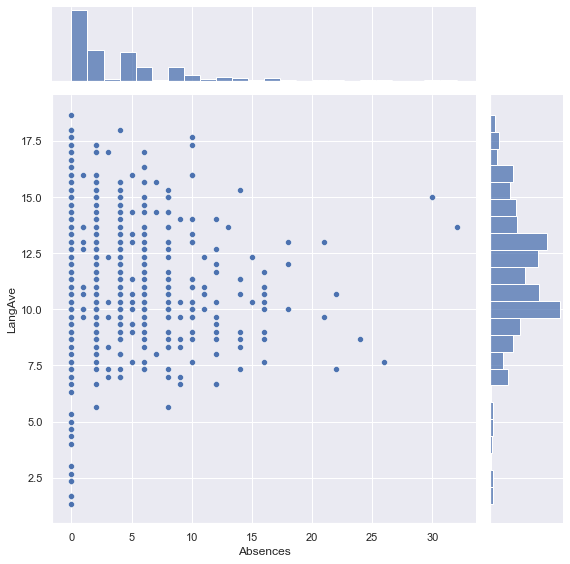

In [56]:
#Language results VS absences
sb.jointplot(data = LangData, x = "Absences", y = "LangAve", height = 8)

* From above jointplots,I cannot conclude that the more days that students are absent from school, the lower grades they will get. As the very low grades are actually from students have full attendence rate(0 absences).However,one thing I notice is that students with very high absences(more than 15 days) are not able to score very high marks.

* Another thing I notice is that there are few students who keep being absent from Math Class, and there might be some specific reasons for schools to investigate,and another they can possibly do is to update the syllabus to make the lessons more interesting,so the students will also love the subject it self. School should also be more strict about students' absense rate, since it really has impact on their grades.

<AxesSubplot:xlabel='Activities', ylabel='LangAve'>

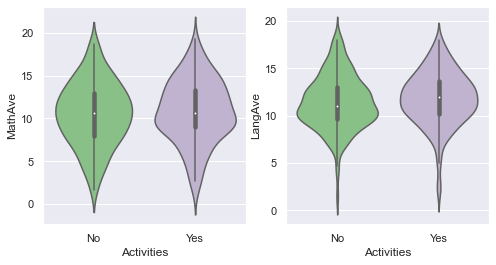

In [57]:
# Recall the results from Question 2(Activities)
f, axes = plt.subplots(1, 2, figsize=(8, 4))
sb.violinplot(data=union,x="Activities",y="MathAve",ax=axes[0],palette="Accent")
sb.violinplot(data=union,x="Activities",y="LangAve",ax=axes[1],palette="Accent")

**< Conclusion >** What School can do for students in order to help them achieve better results:
* Provide educational support to more students
* Update Math curriculum to make the lessons more interesting, at the same time, be more strict about students' attendence.
* Also, from my conclusion from Question 2,extra-curricular activities might also help students with grades by providing them opportunities to improve on certain skills. So, it is advisable for school to design more activities for their students.

---
## Question 4 Which school has a better overall student performance in these two subjects? Why do you think that is?

Some criteria for comparison include:
* Mean, median,standard deviation of each subject 
* Overall distribution of each subject
* Number of Pastfails

Spliting results of students from different schools into different dataframes:

In [58]:
MathSchA = MathData.loc[MathData['School'] == 'SchoolA'] 
MathSchB = MathData.loc[MathData['School'] == 'SchoolB']
LangSchA = LangData.loc[LangData['School'] == 'SchoolA']
LangSchB = LangData.loc[LangData['School'] == 'SchoolB']

<AxesSubplot:xlabel='LangAve', ylabel='School'>

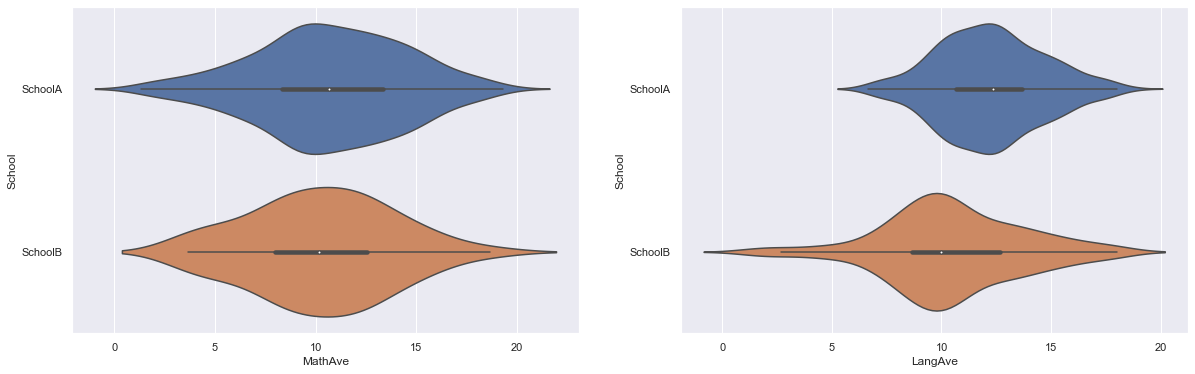

In [59]:
# Violin plots for comparison between 2 schools for both subjects
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.violinplot(x="MathAve",y="School", data = MathData,ax = axes[0])
sb.violinplot(x="LangAve",y="School", data = LangData,ax = axes[1])

From the above plots, it is very obvious that School A did better for Language test, as majority of their students score higher than School B's median, and does not have students score very low(lower than 5 points). For Math tests, School A also has higher median than School B, and while School B's math results is more like a normal distribution, SchoolA's results are more skewed towards the higher marks.

<AxesSubplot:xlabel='LangAve', ylabel='Density'>

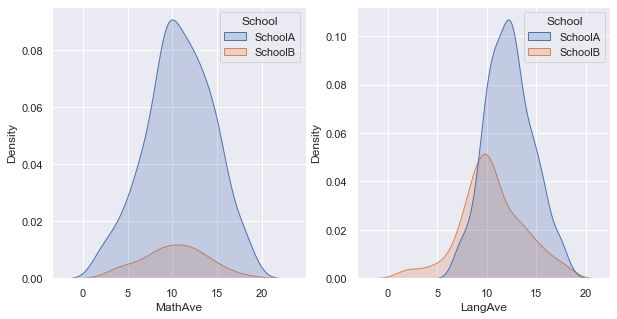

In [60]:
f, axes = plt.subplots(1,2, figsize=(10, 5))
sb.kdeplot(data=MathData, x="MathAve", hue="School", fill=True,ax=axes[0])
sb.kdeplot(data=LangData, x="LangAve", hue="School", fill=True,ax=axes[1])

The kdeplot helps to confirm the conclusion I made above.

Now, check the statistics for the actual difference between the two schools.

In [61]:
MathData[['School','MathAve','mathT1','mathT2','mathT3']].groupby(['School']).agg(['median','mean','std','count'])

MathAve                            mathT1                       \
            median       mean       std count median       mean       std   
School                                                                      
SchoolA  10.666667  10.737345  3.717529   349   11.0  10.939828  3.319109   
SchoolB  10.166667  10.239130  3.543496    46   10.5  10.673913  3.347001   

              mathT2                            mathT3                       \
        count median       mean       std count median       mean       std   
School                                                                        
SchoolA   349     11  10.782235  3.808434   349     11  10.489971  4.625397   
SchoolB    46     10  10.195652  3.377175    46     10   9.847826  4.237229   

               
        count  
School         
SchoolA   349  
SchoolB    46

In [62]:
LangData[['School','LangAve','langT1','langT2','langT3']].groupby(['School']).agg(['median','mean','std','count'])

LangAve                            langT1                       \
            median       mean       std count median       mean       std   
School                                                                      
SchoolA  12.333333  12.235619  2.377911   423     12  11.985816  2.418293   
SchoolB  10.000000  10.482301  3.240779   226     10  10.300885  2.979590   

              langT2                            langT3                       \
        count median       mean       std count median       mean       std   
School                                                                        
SchoolA   423     12  12.144208  2.451522   423     13  12.576832  2.625636   
SchoolB   226     10  10.495575  3.376057   226     11  10.650442  3.833991   

               
        count  
School         
SchoolA   423  
SchoolB   226

Indeed, SchoolA has higher mean and median than school B (about 0.5 point higher for Math and 2 points higher for Language). Also for Language test, school A has much lower standard deviation, which means that the standards of SchoolA students do not differ as much as School B.

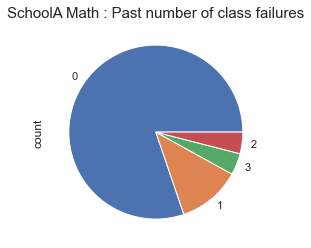

In [63]:
# SchoolA Math : Past number of class failures
MathSchA['PastFails'].value_counts().plot.pie()
plt.title('SchoolA Math : Past number of class failures', fontweight = 30, fontsize = 15)
plt.ylabel('count')
plt.show()

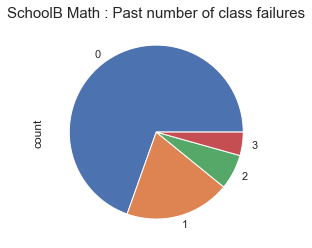

In [64]:
# SchoolB Math : Past number of class failures
MathSchB['PastFails'].value_counts().plot.pie()
plt.title('SchoolB Math : Past number of class failures', fontweight = 30, fontsize = 15)
plt.ylabel('count')
plt.show()

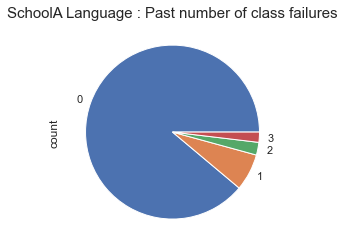

In [65]:
#SchoolA Language : Past number of class failures
LangSchA['PastFails'].value_counts().plot.pie()
plt.title('SchoolA Language : Past number of class failures', fontweight = 30, fontsize = 15)
plt.ylabel('count')
plt.show()

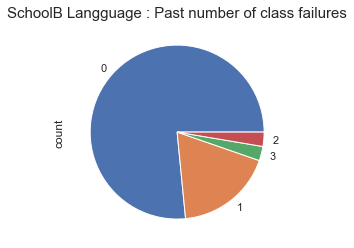

In [66]:
#SchoolB Language : Past number of class failures
LangSchB['PastFails'].value_counts().plot.pie()
plt.title('SchoolB Langguage : Past number of class failures', fontweight = 30, fontsize = 15)
plt.ylabel('count')
plt.show()

After comparing the passing rate, School A also have less number of past class failures than School B for both subjects. 

**< conclusion >:** Overall,School A does better than School B, espcially in language tests.Another factor we need to consider is that,school A has larger cohort size than school B for both subjects, and this might affect the analysis results as well. Larger cohort size also means that the school own enough resources that allow it to have more intakes, such as having more teachers and higher qualifications of their teachers, better facilities etc. And it might also be a reason that contributes to School A's better performance as compared to School B.

---
## Question 5 How do the students perform over time? Are they consistent across terms, or do they gradually improve?

Ask the following questions:
* Are Math students progressing over time(for both schoolA and B)?
* Are Language students progressing over time(for both schoolA and B)?

In [67]:
#Add the last row: average of the column
union.loc['mean'] = union.mean()

In [68]:
#check the mean calculated
union.tail()

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,Health,Absences,mathT1,mathT2,mathT3,MathAve,langT1,langT2,langT3,LangAve
1001,SchoolB,Female,18.000000,Urban,3,1,Teacher,CivilService,1.000000,2,...,1.000000,4.000000,NaN,NaN,NaN,NaN,15.000000,15.000000,16.000000,15.333333
1002,SchoolB,Female,18.000000,Urban,1,1,Other,Other,2.000000,2,...,5.000000,6.000000,NaN,NaN,NaN,NaN,11.000000,12.000000,9.000000,10.666667
1003,SchoolB,Male,17.000000,Urban,3,1,CivilService,CivilService,2.000000,1,...,2.000000,6.000000,NaN,NaN,NaN,NaN,10.000000,10.000000,10.000000,10.000000
1004,SchoolB,Male,18.000000,Rural,3,2,CivilService,Other,3.000000,1,...,5.000000,4.000000,NaN,NaN,NaN,NaN,10.000000,11.000000,11.000000,10.666667
mean,NaN,NaN,16.743284,NaN,NaN,NaN,NaN,NaN,1.528358,NaN,...,3.550249,4.521393,10.908861,10.713924,10.41519,10.679325,11.399076,11.570108,11.906009,11.625064


In [69]:
# Recall the mean of grades (Math)
MathData[['School','MathAve','mathT1','mathT2','mathT3']].groupby(['School']).agg(['mean'])

,MathAve,mathT1,mathT2,mathT3
,mean,mean,mean,mean
School,,,,
SchoolA,10.737345,10.939828,10.782235,10.489971
SchoolB,10.239130,10.673913,10.195652,9.847826


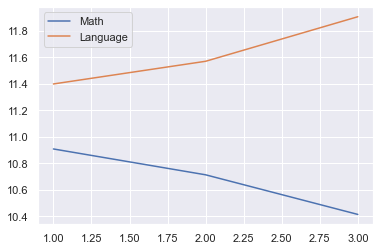

In [70]:
# Overall for both subjects
line = pd.DataFrame({
   'Math':[10.908861,10.713924,10.41519],
   'Language':[11.399076,11.570108,11.906009]
   }, index=[1,2,3])
lines = line.plot.line()

This line graph shows that math students' standards is dropping across 3 terms, while Language students gradually improve across 3 terms.

Now, compare the students' progress from different schools.

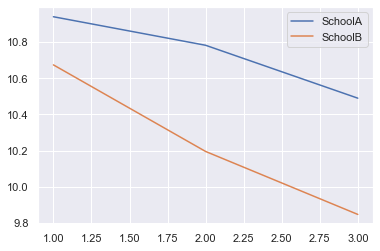

In [71]:
# Line graph for Math grades (both schools)
line = pd.DataFrame({
   'SchoolA': [10.939828,10.782235,10.489971],
   'SchoolB': [10.673913,10.195652,9.847826]
   }, index=[1,2,3])
lines = line.plot.line()

**< conclusion >:** Both schools Math grades drop continuously across 3 terms.

In [72]:
# Recall the mean of grades (Language)
LangData[['School','LangAve','langT1','langT2','langT3']].groupby(['School']).agg(['mean'])

,LangAve,langT1,langT2,langT3
,mean,mean,mean,mean
School,,,,
SchoolA,12.235619,11.985816,12.144208,12.576832
SchoolB,10.482301,10.300885,10.495575,10.650442


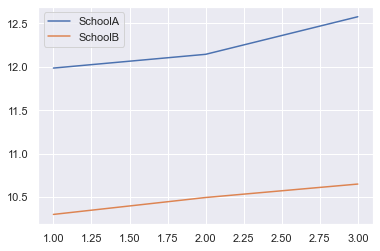

In [73]:
# Line graph for Language grades (both schools)
line = pd.DataFrame({
   'SchoolA': [11.985816,12.144208,12.576832],
   'SchoolB': [10.300885,10.495575,10.650442]
   }, index=[1,2,3])
lines = line.plot.line()

**< conclusion >:** Both Schools' Language grades gradually improve across 3 terms.

---
## Bonus Questions:

Additionally, here are some questions I am interested to explore:
* Do parents' jobs affect students' grades? (I have seen above that higher educational level of their parents)
* How about travelling time?( maybe it has some thing to do with school's address, and check whether the result allign with urban rural analysis)
* Does extra support help students **in the long term**?

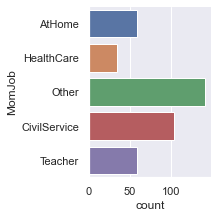

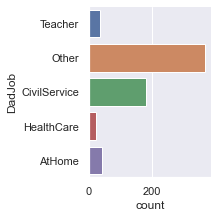

In [74]:
# Check the population for each job
mathmark_data = MathData[MathData["MathAve"] == True]
sb.catplot(y = "MomJob", data = MathData, kind = "count", height = 3)
Langmark_data = LangData[LangData["LangAve"] == True]
sb.catplot(y = "DadJob", data = LangData, kind = "count", height = 3)

Since we do not know what "other" refers to, so we can only compare among the rest of the students.

<AxesSubplot:xlabel='LangAve', ylabel='Density'>

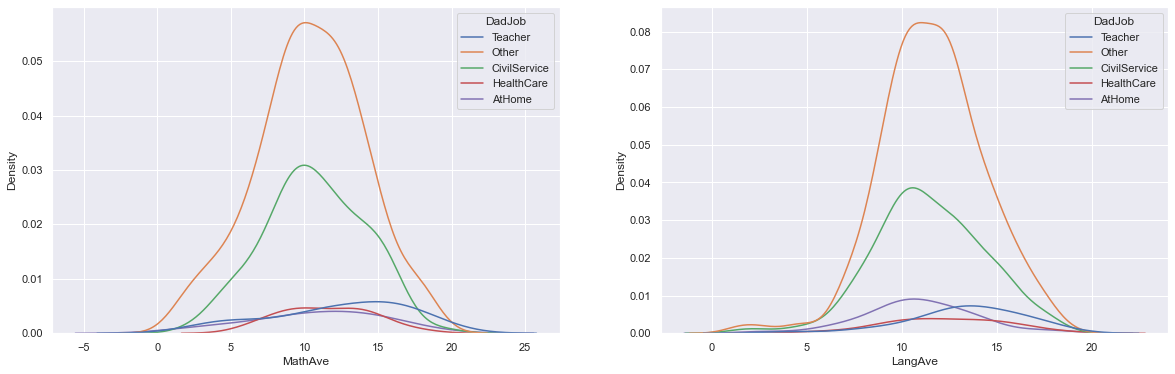

In [75]:
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.kdeplot(data=union, x="MathAve",hue="DadJob",ax=axes[0])
sb.kdeplot(data=union, x="LangAve",hue="DadJob",ax=axes[1])

Conclusion from above kdeplots(Father's job related to students' performance): Students whose father is a teacher, are outstanding in both Math and Language as compared to the rest. 

<AxesSubplot:xlabel='LangAve', ylabel='Density'>

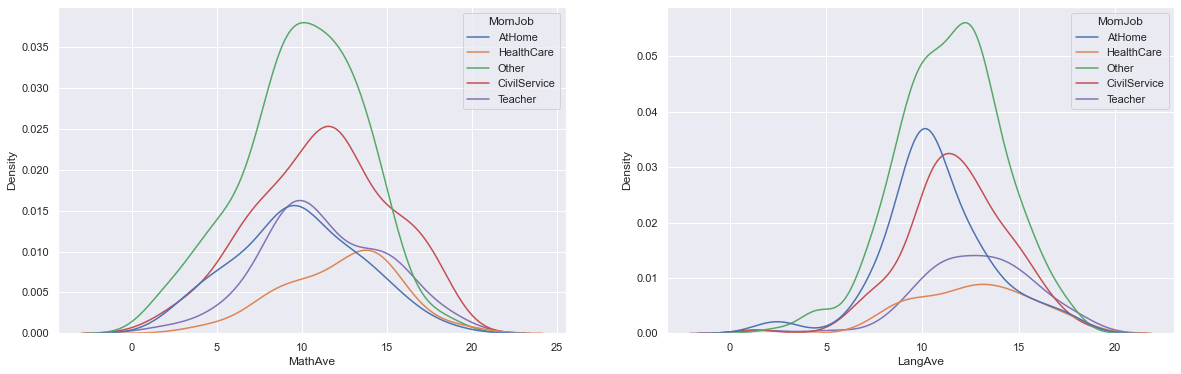

In [76]:
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.kdeplot(data=union, x="MathAve",hue="MomJob",ax=axes[0])
sb.kdeplot(data=union, x="LangAve",hue="MomJob",ax=axes[1])

**< conclusion >:**  Students whose mother works in Healthcare industry are doing better in Math as compared to the rest, and contrary to the father's job vs results analysis, students whose mother is a teacher are performing worse in both subjects as compared to the rest.

How does Travelling Time affect students' performance?

<AxesSubplot:xlabel='LangAve', ylabel='TravelTime'>

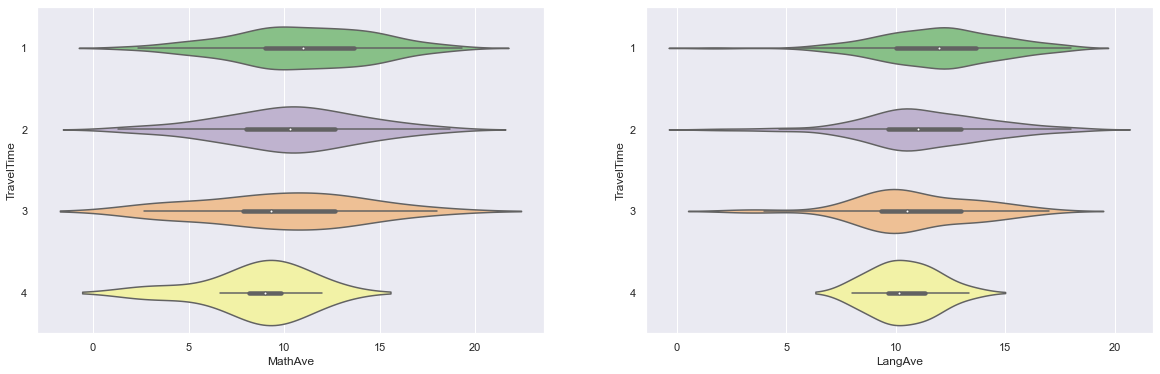

In [77]:
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.violinplot(x="MathAve",y= "TravelTime", data = MathData,orient = 'h',palette='Accent',ax=axes[0])
sb.violinplot(x="LangAve",y= "TravelTime", data = LangData,orient = "h" ,palette='Accent',ax=axes[1])

It shows a very clear pattern that, the longer travel time that a student requires to go to school, the lower they have scored in Math and Language.It also aligns with the analysis of family background (Residence) VS Student' performance, based on that, rural students score worse than urban students. In order to confirm this statement, I plot a heatmap below to check how much travel time a student will need depends on his residence.

<AxesSubplot:xlabel='TravelTime', ylabel='Residence'>

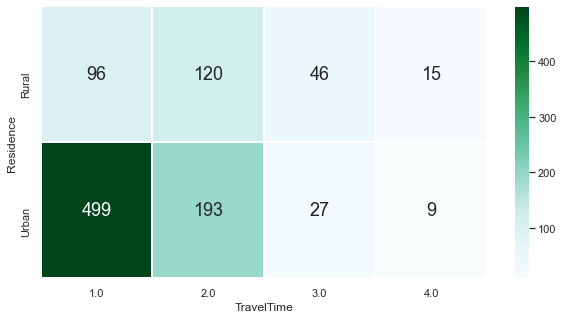

In [78]:
# Distribution of Family Relationship across Family Support
f = plt.figure(figsize=(10, 5))
sb.heatmap(union.groupby(['Residence', 'TravelTime']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

**< conclusion >:** So indeed, majority of urban students only need less than 15 min to go to school but for rural students, even though their total population is significantly lower, the number of students who need more than 30 min to go to school is higher than the urban ones. 

In [79]:
options = ['yes']
withsup_df = union.loc[~union['FamilySup'].isin(options)] 

In [80]:
withsup_df.head()

,School,Gender,Age,Residence,MomEdu,DadEdu,MomJob,DadJob,TravelTime,StudyTime,...,Health,Absences,mathT1,mathT2,mathT3,MathAve,langT1,langT2,langT3,LangAve
0,SchoolA,Female,18.0,Urban,4,4,AtHome,Teacher,2.0,2,...,3.0,6.0,5.0,6.0,6.0,5.666667,NaN,NaN,NaN,NaN
1,SchoolA,Female,17.0,Urban,1,1,AtHome,Other,1.0,2,...,3.0,4.0,5.0,5.0,6.0,5.333333,NaN,NaN,NaN,NaN
2,SchoolA,Female,15.0,Urban,1,1,AtHome,Other,1.0,2,...,3.0,10.0,7.0,8.0,10.0,8.333333,NaN,NaN,NaN,NaN
3,SchoolA,Female,15.0,Urban,4,2,HealthCare,CivilService,1.0,3,...,5.0,2.0,15.0,14.0,15.0,14.666667,NaN,NaN,NaN,NaN
4,SchoolA,Female,16.0,Urban,3,3,Other,Other,1.0,2,...,5.0,4.0,6.0,10.0,10.0,8.666667,NaN,NaN,NaN,NaN


In [81]:
withsup_df[['School','MathAve','mathT1','mathT2','mathT3']].groupby(['School']).agg(['mean'])

,MathAve,mathT1,mathT2,mathT3
,mean,mean,mean,mean
School,,,,
SchoolA,10.737345,10.939828,10.782235,10.489971
SchoolB,10.239130,10.673913,10.195652,9.847826


Since Students'Language results continuously improving across 3 terms, it is not very meaningful if we use language progress as a reference for comparison. So I chose math results, but it shows that even with school support, students from both schools did not improve from term1 to term3. 